In [116]:
%reload_ext autoreload
%autoreload 2

In [117]:
from fastai import *
from fastai.tabular import *

In [118]:
train_df = pd.read_csv('train.csv')

In [119]:
train_df.head().T

,0,1,2,3,4
id,1379560.00,1466964.00,1346989.00,1338232.00,1448490.0
week,1.00,1.00,1.00,1.00,1.0
center_id,55.00,55.00,55.00,55.00,55.0
meal_id,1885.00,1993.00,2539.00,2139.00,2631.0
checkout_price,136.83,136.83,134.86,339.50,243.5
base_price,152.29,135.83,135.86,437.53,242.5
emailer_for_promotion,0.00,0.00,0.00,0.00,0.0
homepage_featured,0.00,0.00,0.00,0.00,0.0
num_orders,177.00,270.00,189.00,54.00,40.0


In [120]:
min(train_df['emailer_for_promotion']),max(train_df['emailer_for_promotion'])

(0, 1)

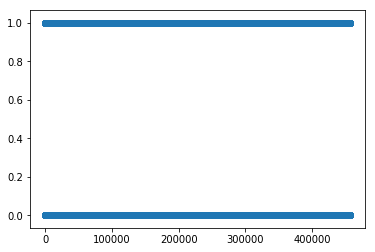

In [121]:
plt.scatter(range(0,456548),train_df['emailer_for_promotion'])

In [122]:
len(train_df)

456548

In [123]:
test_df = pd.read_csv('test_QoiMO9B.csv')

In [124]:
test_df.head().T

,0,1,2,3,4
id,1028232.00,1127204.00,1212707.00,1082698.00,1400926.00
week,146.00,146.00,146.00,146.00,146.00
center_id,55.00,55.00,55.00,55.00,55.00
meal_id,1885.00,1993.00,2539.00,2631.00,1248.00
checkout_price,158.11,160.11,157.14,162.02,163.93
base_price,159.11,159.11,159.14,162.02,163.93
emailer_for_promotion,0.00,0.00,0.00,0.00,0.00
homepage_featured,0.00,0.00,0.00,0.00,0.00


In [125]:
len(test_df)

32573

In [126]:
fci_df = pd.read_csv('fulfilment_center_info.csv')

In [127]:
fci_df.head().T

,0,1,2,3,4
center_id,11,13,124,66,94
city_code,679,590,590,648,632
region_code,56,56,56,34,34
center_type,TYPE_A,TYPE_B,TYPE_C,TYPE_A,TYPE_C
op_area,3.7,6.7,4,4.1,3.6


In [128]:
len(fci_df)

77

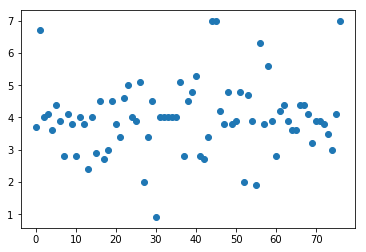

In [129]:
plt.scatter(range(0,77),fci_df['op_area'])

In [130]:
mi_df= pd.read_csv('meal_info.csv')

In [131]:
mi_df.head().T

,0,1,2,3,4
meal_id,1885,1993,2539,1248,2631
category,Beverages,Beverages,Beverages,Beverages,Beverages
cuisine,Thai,Thai,Thai,Indian,Indian


In [132]:
len(mi_df)

51

In [133]:
train_fci = train_df.merge(fci_df, how='left', left_on='center_id', right_on='center_id')
test_fci = test_df.merge(fci_df, how='left', left_on='center_id', right_on='center_id')

In [134]:
train_fci.head().T

,0,1,2,3,4
id,1379560,1466964,1346989,1338232,1448490
week,1,1,1,1,1
center_id,55,55,55,55,55
meal_id,1885,1993,2539,2139,2631
checkout_price,136.83,136.83,134.86,339.5,243.5
base_price,152.29,135.83,135.86,437.53,242.5
emailer_for_promotion,0,0,0,0,0
homepage_featured,0,0,0,0,0
num_orders,177,270,189,54,40
city_code,647,647,647,647,647


In [135]:
test_fci.head().T

,0,1,2,3,4
id,1028232,1127204,1212707,1082698,1400926
week,146,146,146,146,146
center_id,55,55,55,55,55
meal_id,1885,1993,2539,2631,1248
checkout_price,158.11,160.11,157.14,162.02,163.93
base_price,159.11,159.11,159.14,162.02,163.93
emailer_for_promotion,0,0,0,0,0
homepage_featured,0,0,0,0,0
city_code,647,647,647,647,647
region_code,56,56,56,56,56


In [136]:
len(train_fci),len(test_fci)

(456548, 32573)

In [137]:
train_fci_mi = train_fci.merge(mi_df, how='left', left_on='meal_id', right_on='meal_id')
test_fci_mi = test_fci.merge(mi_df, how='left', left_on='meal_id', right_on='meal_id')

In [138]:
train_fci_mi.head().T

,0,1,2,3,4
id,1379560,1466964,1346989,1338232,1448490
week,1,1,1,1,1
center_id,55,55,55,55,55
meal_id,1885,1993,2539,2139,2631
checkout_price,136.83,136.83,134.86,339.5,243.5
base_price,152.29,135.83,135.86,437.53,242.5
emailer_for_promotion,0,0,0,0,0
homepage_featured,0,0,0,0,0
num_orders,177,270,189,54,40
city_code,647,647,647,647,647


In [139]:
test_fci_mi.head().T

,0,1,2,3,4
id,1028232,1127204,1212707,1082698,1400926
week,146,146,146,146,146
center_id,55,55,55,55,55
meal_id,1885,1993,2539,2631,1248
checkout_price,158.11,160.11,157.14,162.02,163.93
base_price,159.11,159.11,159.14,162.02,163.93
emailer_for_promotion,0,0,0,0,0
homepage_featured,0,0,0,0,0
city_code,647,647,647,647,647
region_code,56,56,56,56,56


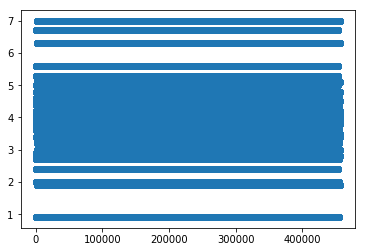

In [140]:
plt.scatter(range(0,456548),train_fci_mi['op_area'])

In [141]:
len(train_fci_mi),len(test_fci_mi)

(456548, 32573)

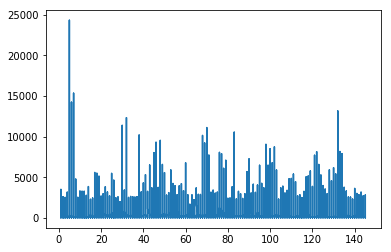

In [142]:
plt.plot(train_fci_mi['week'],train_fci_mi['num_orders'])

In [143]:
train_fci_mi.head().T

,0,1,2,3,4
id,1379560,1466964,1346989,1338232,1448490
week,1,1,1,1,1
center_id,55,55,55,55,55
meal_id,1885,1993,2539,2139,2631
checkout_price,136.83,136.83,134.86,339.5,243.5
base_price,152.29,135.83,135.86,437.53,242.5
emailer_for_promotion,0,0,0,0,0
homepage_featured,0,0,0,0,0
num_orders,177,270,189,54,40
city_code,647,647,647,647,647


In [144]:
test_fci_mi

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
5,1284113,146,55,1778,190.15,190.15,0,0,647,56,TYPE_C,2.0,Beverages,Italian
6,1197966,146,55,1062,191.09,192.09,0,0,647,56,TYPE_C,2.0,Beverages,Italian
7,1132739,146,55,2707,242.56,240.56,0,0,647,56,TYPE_C,2.0,Beverages,Italian
8,1057981,146,55,1207,360.90,360.90,0,0,647,56,TYPE_C,2.0,Beverages,Continental
9,1095932,146,55,1230,383.18,384.18,0,0,647,56,TYPE_C,2.0,Beverages,Continental


In [145]:
procs=[FillMissing, Categorify, Normalize]

In [150]:
train_fci_mi['week'] = train_fci_mi['week']%52
test_fci_mi['week'] = test_fci_mi['week']%52

In [151]:
cat_vars = ['week', 'city_code', 'region_code','meal_id','center_id', 'center_type', 'category', 'cuisine', 'emailer_for_promotion', 'homepage_featured']
cont_vars = ['checkout_price', 'base_price','op_area']
dep_var = ['num_orders']

In [152]:
df = train_fci_mi[cat_vars + cont_vars + dep_var].copy()

In [153]:
val_cut = range(int(.2*len(train_df)))

In [154]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idx(val_cut)
                   .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                    .add_test(ItemList.from_df(test_fci_mi))
                   .databunch())

In [155]:
max_log_y = np.log(np.max(train_df['num_orders'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [156]:
def rmsle(pred:FloatTensor, targ:FloatTensor)->Rank0Tensor:
    "Exp RMSE between `pred` and `targ`."
    assert pred.numel() == targ.numel(), "Expected same numbers of elements in pred & targ"
    if len(pred.shape)==2: pred=pred.squeeze(1)
    pct_var = torch.log((pred+1)/(targ+1))
    return torch.sqrt((pct_var**2).mean())*100

In [157]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=rmsle)

In [158]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(53, 15)
    (1): Embedding(52, 15)
    (2): Embedding(9, 5)
    (3): Embedding(52, 15)
    (4): Embedding(78, 18)
    (5): Embedding(4, 3)
    (6): Embedding(15, 7)
    (7): Embedding(5, 4)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=91, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=500, out_features=1, bias=True)
  )
)

In [159]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


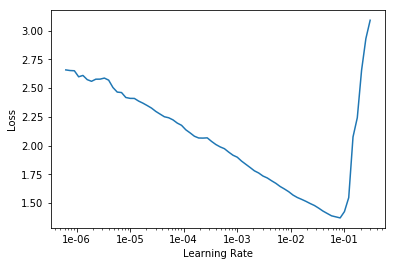

In [160]:
learn.recorder.plot()

In [161]:
learn.fit_one_cycle(5, 3e-4, wd=0.2)

epoch,train_loss,valid_loss,rmsle
1,0.335000,0.327319,10.918768
2,0.298210,0.314638,10.700562
3,0.273844,0.313447,10.701155
4,0.246613,0.308491,10.602242
5,0.262802,0.307557,10.561275


In [162]:
learn.fit_one_cycle(5, 1e-3, wd=0.1)

epoch,train_loss,valid_loss,rmsle
1,0.310973,0.330992,10.939032
2,0.283696,0.325074,10.858145
3,0.272121,0.338719,11.074542
4,0.255015,0.320885,10.800696
5,0.259650,0.317985,10.696279


In [165]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
key_ids = test_df['id']
out1 = pd.DataFrame({'id': key_ids, 'num_orders': np.exp(preds.numpy()[:,0])})

In [166]:
out

,id,num_orders
0,1028232,171.639725
1,1127204,192.092316
2,1212707,158.219589
3,1082698,43.340305
4,1400926,35.185963
5,1284113,188.458496
6,1197966,184.382324
7,1132739,181.286896
8,1057981,75.135666
9,1095932,77.797203


In [87]:
out

,id,num_orders
0,1028232,174.376907
1,1127204,164.026352
2,1212707,145.812531
3,1082698,39.495937
4,1400926,34.121281
5,1284113,183.750031
6,1197966,192.997314
7,1132739,171.853226
8,1057981,89.312180
9,1095932,76.511238


In [110]:
learn.save('all3weekmod-1')

In [111]:
out.to_csv('all3weekmod-1.csv', index=False)